Module Imports 

In [77]:
from os import walk
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

All the file path imports 

In [143]:
example_file='SpamData/01_Processing/practice_email.txt'
spam1path='SpamData/01_Processing/spam_assassin_corpus/spam_1'
spam2path='SpamData/01_Processing/spam_assassin_corpus/spam_2'
easynonspam1path='SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
easynonspam2path='SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'


spam_cat=1
ham_cat=0

Data_json_file='SpamData/01_Processing/email-text-data.json'

WHALE_FILE = 'SpamData/01_Processing/wordcloud_resources/whale-icon.png'
SKULL_FILE = 'SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
CUSTOM_FONT_FILE = 'SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'

In [48]:
stream=open(example_file,encoding='latin-1')
message=stream.read()
stream.close()
print(message)


From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [49]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [50]:
stream=open(example_file,encoding='latin-1')
is_body=False
lines=[]

for line in stream: 
    if is_body:
        lines.append(line)
    elif line=='\n':
        is_body=True

stream.close()
email_body='\n'.join(lines)
print(email_body)




Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

Generator Functions

In [51]:
def generate_squares(N):
    for num in range(N):
        yield num** 2

Email Body extraction using generator function

In [52]:
def emailbodygen(path):
    for root,dirname,filenames in walk(path):
        for file_name in filenames:
            filepath=join(root,file_name)
            stream=open(filepath,encoding='latin-1')
            is_body=False
            lines=[]

            for line in stream: 
                if is_body:
                    lines.append(line)
                elif line=='\n':
                    is_body=True

            stream.close()
            email_body='\n'.join(lines)
            yield file_name,email_body
            

In [53]:
def dffromdir(path,classification):
    rows=[]
    rownames=[]
    for file_name,email_body in emailbodygen(path):
        rows.append({'MESSAGE':email_body,'CATEGORY':classification})
        rownames.append(file_name)

    return pd.DataFrame(rows,index=rownames)

 

In [54]:
spam_emails=dffromdir(spam1path,1)
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [55]:
spam_emails.shape

(501, 2)

In [56]:
ham_emails=dffromdir(easynonspam1path,ham_cat)
ham_emails.append(dffromdir(easynonspam2path,ham_cat))
ham_emails.shape

C:\Users\diyab\AppData\Local\Temp\ipykernel_23020\3899991773.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ham_emails.append(dffromdir(easynonspam2path,ham_cat))


(2501, 2)

In [57]:
data=pd.concat([spam_emails,ham_emails])
print('shape of entire dataframe is:')
data.shape

shape of entire dataframe is:


(3002, 2)

In [58]:
data.head(10)

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
00006.5ab5620d3d7c6c0db76234556a16f6c1,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1
00007.d8521faf753ff9ee989122f6816f87d7,Help wanted. We are a 14 year old fortune 500...,1
00008.dfd941deb10f5eed78b1594b131c9266,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1
00009.027bf6e0b0c4ab34db3ce0ea4bf2edab,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1
00010.445affef4c70feec58f9198cfbc22997,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1


non-spam are here, cateogory =0

In [59]:
data.tail(10)

,MESSAGE,CATEGORY
02492.6aede44f654a1bbc60c95c7dd770e624,Carlos Luna wrote:\n\n\n\n>Hi all.\n\n>Does an...,0
02493.f9f2870094430b7db8b0c1052b302cf1,Hi all\n\n\n\n\n\nI have a prob when trying to...,0
02494.a14f2d3a9bef3f59aa419b03aee8f871,Tim Chapman writes:\n\n\n\n> http://news.bbc.c...,0
02495.5064946e77b3046873da91fc47656465,> I had the same problem when installing Win o...,0
02496.aae0c81581895acfe65323f344340856,Man killed 'trying to surf' on Tube train \n\n...,0
02497.60497db0a06c2132ec2374b2898084d3,"Hi Gianni,\n\n\n\nA very good resource for thi...",0
02498.09835f512f156da210efb99fcc523e21,Gianni Ponzi wrote:\n\n> I have a prob when tr...,0
02499.b4af165650f138b10f9941f6cc5bce3c,Neale Pickett <neale@woozle.org> writes:\n\n\n...,0
02500.05b3496ce7bca306bed0805425ec8621,"\n\nHi,\n\n\n\nI think you need to give us a l...",0
cmds,,0


Data Cleaning

In [60]:
data['MESSAGE'].isnull().values.any()

False

Check if any strings are present that have length 0

In [61]:
(data.MESSAGE.str.len()==0).any()

True

In [62]:
(data.MESSAGE.str.len()==0).sum()

2

In [63]:
data.MESSAGE.isnull().sum()

0

Locate empty emails

In [64]:
data[data.MESSAGE.str.len()==0].index

Index(['cmds', 'cmds'], dtype='object')

Remove system file entries that are empty

In [65]:
data.drop(['cmds'],inplace=True)

Check if any empty emails remain in dataset

In [66]:
(data.MESSAGE.str.len()==0).any()

False

In [67]:
data.shape

(3000, 2)

Add Document IDs to Track emails in Dataset

In [68]:
document_ids=range(0,len(data.index))
data['DOC_ID']=document_ids

In [69]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
02496.aae0c81581895acfe65323f344340856    2995
02497.60497db0a06c2132ec2374b2898084d3    2996
02498.09835f512f156da210efb99fcc523e21    2997
02499.b4af165650f138b10f9941f6cc5bce3c    2998
02500.05b3496ce7bca306bed0805425ec8621    2999
Name: DOC_ID, Length: 3000, dtype: int64

In [71]:
data['FILE_NAME']=data.index
data.set_index('DOC_ID',inplace=True)
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [72]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
2995,Man killed 'trying to surf' on Tube train \n\n...,0,02496.aae0c81581895acfe65323f344340856
2996,"Hi Gianni,\n\n\n\nA very good resource for thi...",0,02497.60497db0a06c2132ec2374b2898084d3
2997,Gianni Ponzi wrote:\n\n> I have a prob when tr...,0,02498.09835f512f156da210efb99fcc523e21
2998,Neale Pickett <neale@woozle.org> writes:\n\n\n...,0,02499.b4af165650f138b10f9941f6cc5bce3c
2999,"\n\nHi,\n\n\n\nI think you need to give us a l...",0,02500.05b3496ce7bca306bed0805425ec8621


Save to file using Pandas 

In [74]:
data.to_json(Data_json_file)

Number of Spam Messages visualised(Pie Charts):

In [75]:
data.CATEGORY.value_counts()

0    2500
1     500
Name: CATEGORY, dtype: int64

In [76]:
amount_of_spam=data.CATEGORY.value_counts()[1]
amount_of_nonspam=data.CATEGORY.value_counts()[0]

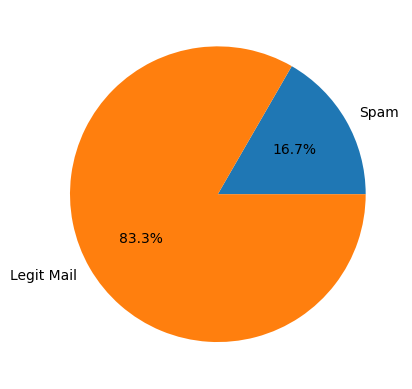

In [82]:
category_names=['Spam','Legit Mail']
sizes=[amount_of_spam,amount_of_nonspam]
plt.pie(sizes,labels=category_names,startangle=0,autopct='%1.1f%%')
plt.show()

Making a Donut Chart

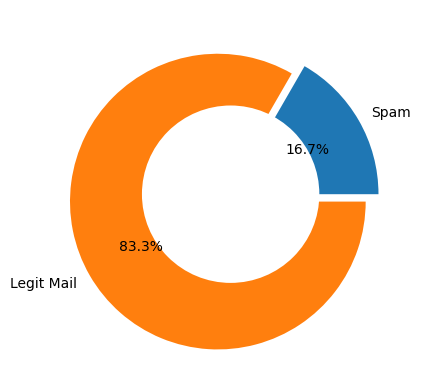

In [86]:
category_names=['Spam','Legit Mail']
sizes=[amount_of_spam,amount_of_nonspam]
plt.pie(sizes,labels=category_names,startangle=0,autopct='%1.1f%%',explode=[0,0.1])

centre_circle=plt.Circle((0,0),radius=0.6,fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

Natural Language Processing 

Text Pre-processing

In [89]:
import nltk

In [90]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [91]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diyab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [92]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diyab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [93]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\diyab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\diyab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\shakespeare.zip.


True

Tokenizing 

In [94]:
msg="All work and no play makes Jack a dull boy"
word_tokenize(msg.lower())

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy']

Removing Stopwords

In [95]:
stop_words=set(stopwords.words('english'))


In [96]:
type(stop_words)

set

In [97]:
if 'this' in stop_words: 
    print("Found it!")

Found it!


In [98]:
if 'hello' not in stop_words: print('Nope. Not in here')

Nope. Not in here


In [99]:
msg="All work and no play makes Jack a dull boy"
words=word_tokenize(msg.lower())

filtered_words=[]
for word in words:
    if word not in stop_words:
        filtered_words.append(word)

print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy']


WORD Stems and Stemming

In [100]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

In [102]:
msg="All work and no play makes Jack a dull boy. To be or not to be. \
      Nobody is expecting the Spanish Inquisition!"
words=word_tokenize(msg.lower())

stemmer=SnowballStemmer('english')
filtered_words = []
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inquisit', '!']


Removing Punctuation

In [103]:
'p'.isalpha()

True

In [104]:
'?'.isalpha()

False

In [105]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be. ??? \
      Nobody expects the Spanish Inquisition!'

words = word_tokenize(msg.lower())
stemmer = SnowballStemmer('english')
filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


Removing HTML tags from emails 

In [106]:
from bs4 import BeautifulSoup


In [107]:
soup=BeautifulSoup(data.at[2,'MESSAGE'],'html.parser')
print(soup.prettify())

1) Fight The Risk of Cancer!

http://www.adclick.ws/p.cfm?o=315&amp;s=pk007



2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days

http://www.adclick.ws/p.cfm?o=249&amp;s=pk007



3) Get the Child Support You Deserve - Free Legal Advice

http://www.adclick.ws/p.cfm?o=245&amp;s=pk002



4) Join the Web's Fastest Growing Singles Community

http://www.adclick.ws/p.cfm?o=259&amp;s=pk007



5) Start Your Private Photo Album Online!

http://www.adclick.ws/p.cfm?o=283&amp;s=pk007



Have a Wonderful Day,

Offer Manager

PrizeMama



























If you wish to leave this list please use the link below.

http://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417



In [109]:
soup.get_text()

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

Functions for email processing

In [110]:
def clean_message(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(message.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [111]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [112]:
def clean_msg_no_html(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
#             filtered_words.append(word) 
    
    return filtered_words

In [113]:
clean_msg_no_html(data.at[2,'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

APPLY CLEANING AND TOKENIZATION TO ALL THE MESSAGES 

In [114]:
data.iat[2,2]

'00003.2ee33bc6eacdb11f38d052c44819ba6c'

In [116]:
data.iloc[5:11]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997
10,Cellular Phone Accessories All At Below Wholes...,1,00011.61816b9ad167657773a427d890d0468e


In [117]:
first_emails=data.MESSAGE.iloc[0:3]

nested_list=first_emails.apply(clean_message)

In [118]:
flat_list = [item for sublist in nested_list for item in sublist]
        
len(flat_list)

321

In [119]:
flat_list

['doctyp',
 'html',
 'public',
 'html',
 'html',
 'head',
 'meta',
 'ype',
 'meta',
 'mshtml',
 'bodi',
 'insert',
 'calypso',
 'tabl',
 'color',
 'black',
 'display',
 'none',
 'tbodi',
 'tr',
 'td',
 'hr',
 'noshad',
 'tr',
 'td',
 'hr',
 'noshad',
 'end',
 'calypso',
 'insert',
 'font',
 'arial',
 'helvetica',
 'br',
 'end',
 'calypso',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'save',
 'life',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'spend',
 'center',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'life',
 'quot',
 'save',
 'center',
 'p',
 'p',
 'br',
 'p',
 'center',
 'tabl',
 'tbodi',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'b',
 'font',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'tr',
 'td',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'font',
 'b',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',

In [120]:
%%time

# use apply() on all the messages in the dataframe
nested_list = data.MESSAGE.apply(clean_msg_no_html)

C:\Users\diyab\AppData\Local\Temp\ipykernel_23020\2119764486.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(message, 'html.parser')
C:\Users\diyab\AppData\Local\Temp\ipykernel_23020\2119764486.py:5: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(message, 'html.parser')


CPU times: total: 10 s
Wall time: 13.9 s


In [121]:
nested_list.tail()

DOC_ID
2995    [man, kill, surf, tube, train, ananova, wednes...
2996    [hi, gianni, good, resourc, http, http, walk, ...
2997    [gianni, ponzi, wrote, prob, tri, instal, linu...
2998    [neal, pickett, write, skip, montanaro, write,...
2999    [hi, think, need, give, us, littl, detail, inf...
Name: MESSAGE, dtype: object

USE logic to slice Dataframes 

In [122]:
data[data.CATEGORY==1].shape

(500, 3)

In [123]:
data[data.CATEGORY == 1].tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
495,<html>\n\n<head>\n\n<title>Toy</title>\n\n</he...,1,00496.1a37de098f6c8847c3c7839d73cc7106
496,<html>\n\n<head>\n\n<title>Untitled Document</...,1,00497.ebf699da617b11135f3aa9173b9781b9
497,This is an HTML email message. If you see thi...,1,00498.48c3098854d339353f1a28a13b196017
498,<html>\n\n<head>\n\n</head>\n\n <body backgro...,1,00499.988506a852cf86b396771a8bdc8cf839
499,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",1,00500.85b72f09f6778a085dc8b6821965a76f


In [124]:
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index

In [125]:
doc_ids_ham

Int64Index([ 500,  501,  502,  503,  504,  505,  506,  507,  508,  509,
            ...
            2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
           dtype='int64', name='DOC_ID', length=2500)

Subsetting a series with an Index

In [126]:
type(doc_ids_ham)

pandas.core.indexes.numeric.Int64Index

In [127]:
type(nested_list)

pandas.core.series.Series

In [128]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [129]:
nested_list_ham.shape

(2500,)

In [130]:
nested_list_ham.tail()

DOC_ID
2995    [man, kill, surf, tube, train, ananova, wednes...
2996    [hi, gianni, good, resourc, http, http, walk, ...
2997    [gianni, ponzi, wrote, prob, tri, instal, linu...
2998    [neal, pickett, write, skip, montanaro, write,...
2999    [hi, think, need, give, us, littl, detail, inf...
Name: MESSAGE, dtype: object

In [131]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [132]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()

normal_words.shape[0] 

15733

In [133]:
normal_words[:10]

http      4312
use       2124
list      1386
get       1381
one       1338
mail      1238
like      1177
would     1142
messag    1091
time      1077
dtype: int64

In [134]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()

spammy_words.shape[0]

7130

In [135]:
spammy_words[:10]

free      670
email     632
http      622
receiv    547
money     505
list      478
pleas     474
get       469
name      421
order     416
dtype: int64

Creating a wordcloud

In [136]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

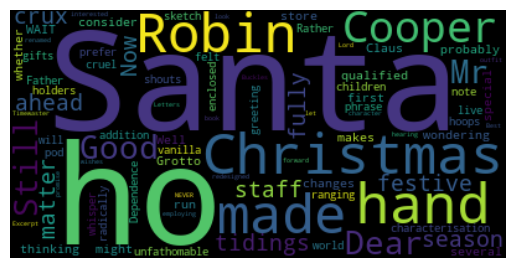

In [137]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [138]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [139]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [140]:
example_corpus

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [141]:
word_list = [''.join(word) for word in example_corpus]
novel_as_string = ' '.join(word_list)

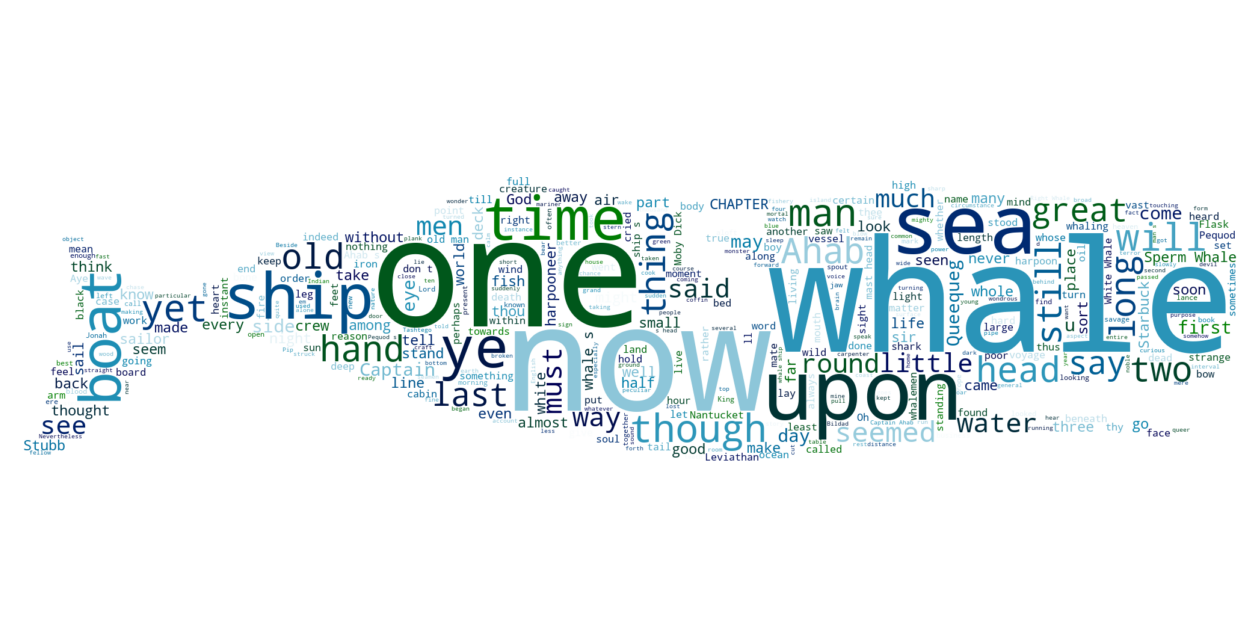

In [144]:
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=400, colormap='ocean')

word_cloud.generate(novel_as_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [145]:
rgb_array.shape

(1024, 2048, 3)

In [146]:
rgb_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [147]:
rgb_array[500,1000]

array([0, 0, 0], dtype=uint8)

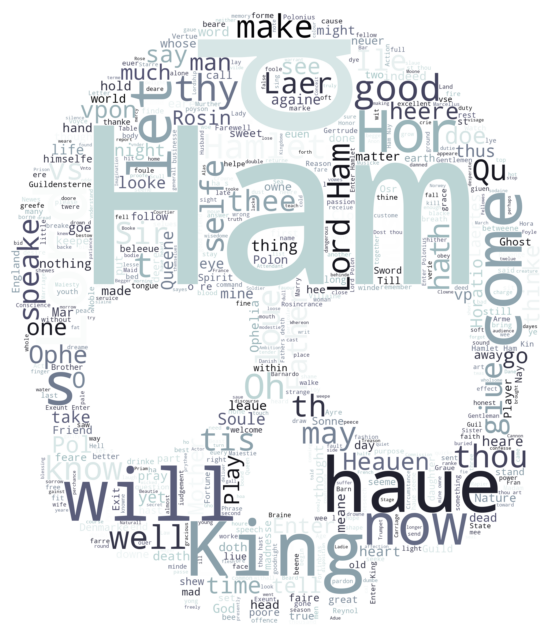

In [148]:
hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
word_list = [''.join(word) for word in hamlet_corpus]
hamlet_as_string = ' '.join(word_list)

skull_icon = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB', size=skull_icon.size, color=(255, 255, 255))
image_mask.paste(skull_icon, box=skull_icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask=rgb_array, background_color='white',
                      colormap='bone', max_words=600)

word_cloud.generate(hamlet_as_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()